In [1]:
# Basic Libraries of AI
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier


# Digits(0-9) MNIST dataset

In [3]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [4]:
#X_train_digit                  # it shows the digits(numbers) of each pixels in "matrix format" for grayscale type(0-255)....(input)

In [5]:
y_train_digit                   # it shows the overall pixel values.....(output)

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

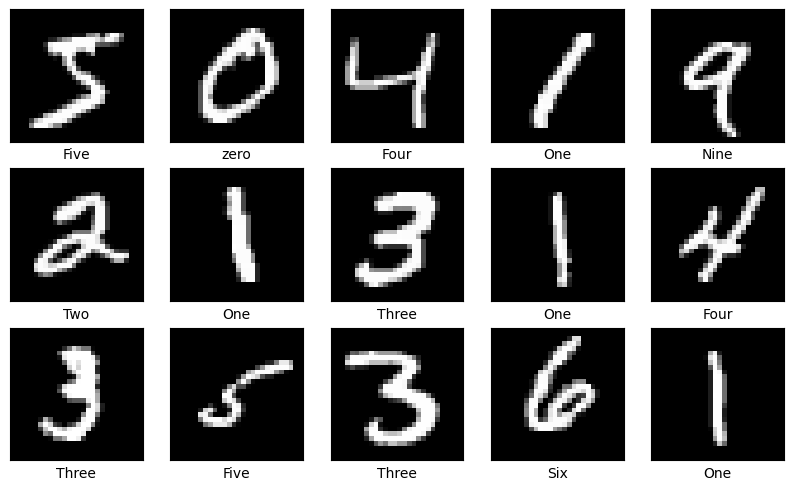

In [6]:
#Names of numbers in the dataset in order

col_names = ['zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10)) # overall layout(height and width) of (0-9) in "output"...
for i in range(15):
    plt.subplot(5,5,i+1)    # 5*5=15  "15 grid" in "output"  and subplots index starts at "1" not "0"...
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')  # X_train_digit[i] index wise taking a matrix format(pixels) of (0-9) numbers mentioned in above cell...
    plt.xlabel(col_names[y_train_digit[i]])    # exact matching of numbers names because it already stored in  "mnist.load_data()"......
plt.show()

In [7]:
X_train_digit.shape   # training images=60000, 28*28=each 60000 image height* width...

(60000, 28, 28)

In [8]:
X_test_digit.shape    # testing images=10000 , overall = 60000+10000=70000

(10000, 28, 28)

# Preprocessing

#  Converting 3d - 2d...(INPUT(X))

In [11]:
# ANN supports 2-dimension only

X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [12]:
X_train_digit.shape

(60000, 784)

In [13]:
X_test_digit.shape

(10000, 784)

# Converting 1D - 2D by One heart encoding...(OUTPUT(Y))

In [15]:
y_train_digit.shape  # 1D

(60000,)

In [16]:
#Encoding Digit MNIST 

y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [17]:
y_train_digit.shape  # 2D

(60000, 10)

# Creating a Neural network(brain) using ANN

In [19]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),  # input(784) and 1st hidden layer(256)  with "relu" activation function..
    #layers.Dropout(0.3),             # reducing the "accuracy" of training for good performance in testing...
    #layers.BatchNormalization(),     # like standardscalar() method...
    
    layers.Dense(64, activation='relu'),   # 2nd hidden layer with "relu" activation function ..
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),   # 3rd hidden layer  with "relu" activation function..
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'), # output layer  with "sigmoid" activation function..
])

C:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

#param_number = output_channel_number * (input_channel_number + 1)---Ex:256(784+1)=200,960......

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling and creating the model

In [22]:
# Compiling the model with "Hyper Tunning" parameters.... 

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])         # loss= finding error

In [23]:
# Model creation(Neural network learning)

history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6287 - loss: 3.7012 - val_accuracy: 0.8205 - val_loss: 0.3287
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8053 - loss: 0.3121 - val_accuracy: 0.8366 - val_loss: 0.2517
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8109 - loss: 0.2058 - val_accuracy: 0.7662 - val_loss: 0.2481
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7981 - loss: 0.1602 - val_accuracy: 0.7398 - val_loss: 0.2323
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7881 - loss: 0.1391 - val_accuracy: 0.8111 - val_loss: 0.1890
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7799 - loss: 0.1232 - val_accuracy: 0.7833 - val_loss: 0.2074
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7984 - loss: 0.1132 - val_accuracy: 0.7608 - val_loss: 0.1595
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7751 - loss: 0.0984 - val_accuracy: 0.

In [24]:
#Predicting the model....

y_predict = model.predict(X_test_digit)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [25]:
#y_predict

In [26]:
y_predict[0]

array([8.0607337e-05, 9.9862981e-01, 9.9999905e-01, 9.9999624e-01,
       9.9996942e-01, 3.2891859e-03, 8.3847597e-05, 1.0000000e+00,
       9.9908227e-01, 9.9997568e-01], dtype=float32)

In [27]:
y_test_digit

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
# argmax() will get the index of "maximum" value in the  above encoded vector "y_predict" automatically convert (2D-1D) Again...

y_predicts=np.argmax(y_predict, axis=1)  
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [29]:
y_predicts      # index == values here...(predicted output )

array([7, 2, 1, ..., 1, 3, 6], dtype=int64)

In [30]:
y_test_digit_eval    # index == values here...( Actual output)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

# Model Evaluation

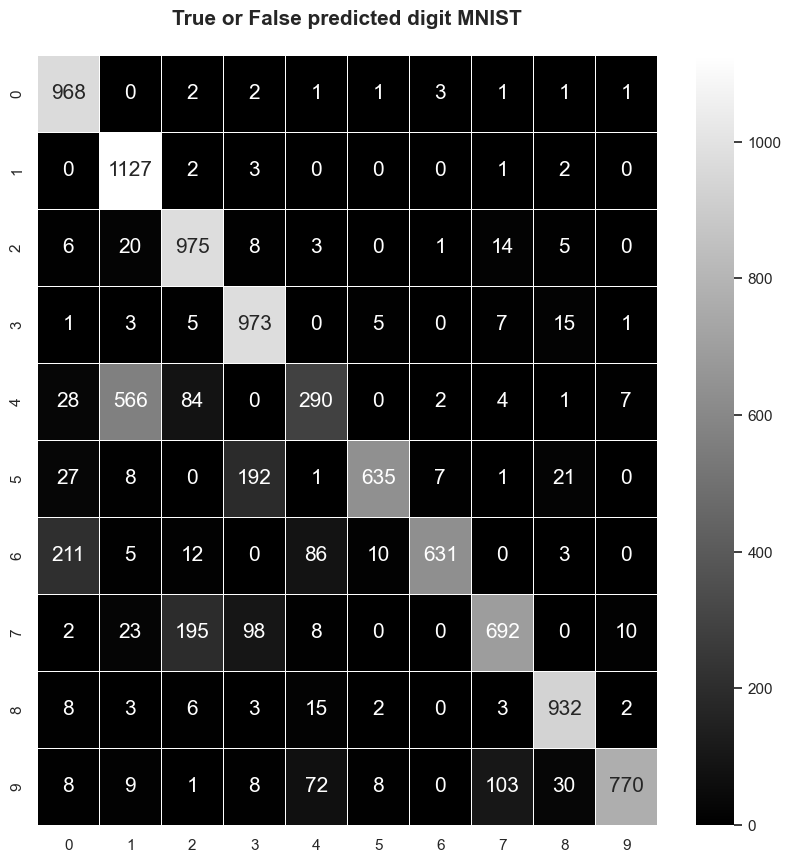

In [32]:
#Confusion matrix (Actual output - predicted output) and it's visualization...

con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show() 

In [33]:
# creating "score_card" using Actual output and predicted output...

from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86       980
           1       0.64      0.99      0.78      1135
           2       0.76      0.94      0.84      1032
           3       0.76      0.96      0.85      1010
           4       0.61      0.30      0.40       982
           5       0.96      0.71      0.82       892
           6       0.98      0.66      0.79       958
           7       0.84      0.67      0.75      1028
           8       0.92      0.96      0.94       974
           9       0.97      0.76      0.86      1009

    accuracy                           0.80     10000
   macro avg       0.82      0.79      0.79     10000
weighted avg       0.82      0.80      0.79     10000



# Data Visulaization

In [35]:
history.history.keys()   # "history" is the variable of model creation above...

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

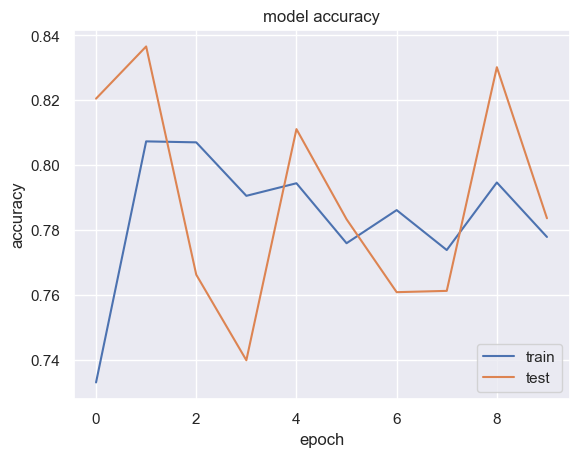

In [36]:
# summarize history for "accuracy"

plt.plot(history.history['accuracy'])   # training accuracy
plt.plot(history.history['val_accuracy']) # testing accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


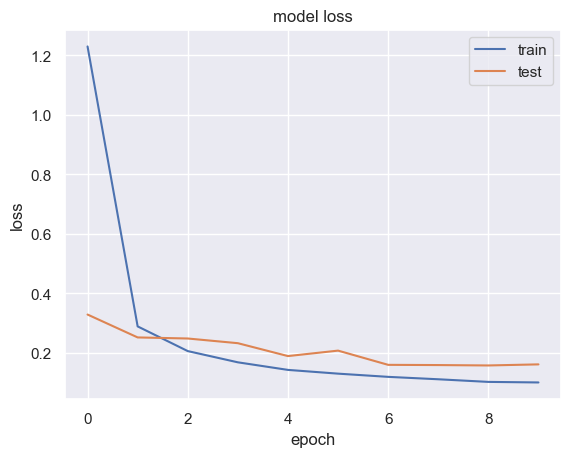

In [37]:
# summarize history for "loss function"...

plt.plot(history.history['loss'])    # training loss
plt.plot(history.history['val_loss']) # testing loss
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()